<a href="https://colab.research.google.com/github/AstridSerruto/Projects/blob/master/Customer%20Segmentation/Customer_Segmentation_w_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Introduction

You decide to buy a hat from an online store. Do you ever wonder if other people with similar likes would buy the same hat. 

How would you determine their similarity to you. Same age, same hobbies, same gender, etc.

In marketing, Companies use data to find out who buys the same hat.

Customer segmentation tries to find and group of customers based on common characteristics such as age, gender, living area, spending behavior, etc. So that we can target marketinf to theses customers more  effectively.

##Importing Libraries

We will use Matplotlib and Seaborn for visualizations. And a variety of the sklearn libraries like KMeans, We will also use pickle to save the models.



In [2]:
#Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import scipy
import seaborn as sns
sns.set()

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

##Download Data

In [4]:
from google.colab import drive 
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/My Drive/Customer Segmentation/segmentation_data.csv', index_col = 0)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


All data has been collected through the loyalty cards customers use at checkout.

We will start by understanding the data.

Variable Description

ID: Shows a unique identification of a customer.

Sex: 0: male, 1: female

Marital status: 0: single

1: non-single (divorced / separated / married / widowed)

Age: The age of the customer in years, calculated as current year minus the year of birth of the customer at the time of the creation of the dataset

18 Min value (the lowest age observed in the dataset)

76 Max value (the highest age observed in the dataset)

Education: Level of education of the customer.

0:other / unknown

1: high school

2: university

3: graduate school

Income: Self-reported annual income in US dollars of the customer.

35832 Min value (the lowest income observed in the dataset)

309364 Max value (the highest income observed in the dataset)

Occupation: Category of occupation of the customer.

0: unemployed/unskilled

1: skilled employee / official

2: management / self-employed / highly qualified employee / officer

Settlement size: The size of the city that the customer lives in.

0: small city

1: mid-sized city

2: big city

##Exploring the Data

In [5]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,,,,,,,
100000001,0,0,67,2,124670,1,2
100000002,1,1,22,1,150773,1,2
100000003,0,0,49,1,89210,0,0
100000004,0,0,45,1,171565,1,1
100000005,0,0,53,1,149031,1,1


In [6]:
#Descriptive statistics about the data
df.describe()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


We can see the minimun age is 18 and and the oldest customer is 76 years old. We can also see that the highest income is 309364 and the average is around 120000.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 100000001 to 100002000
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Sex              2000 non-null   int64
 1   Marital status   2000 non-null   int64
 2   Age              2000 non-null   int64
 3   Education        2000 non-null   int64
 4   Income           2000 non-null   int64
 5   Occupation       2000 non-null   int64
 6   Settlement size  2000 non-null   int64
dtypes: int64(7)
memory usage: 125.0 KB


The dataset does not contain any null values and all the variables are intergers.

We will check how the variables correlate to get a better understanding of the relationship between them.

We calculate the correlation between our variables using corr method in the pandas library and visualize them with a heatmap.

In [10]:
df.corr()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Sex,1.000000,0.566511,-0.182885,0.244838,-0.195146,-0.202491,-0.300803
Marital status,0.566511,1.000000,-0.213178,0.374017,-0.073528,-0.029490,-0.097041
Age,-0.182885,-0.213178,1.000000,0.654605,0.340610,0.108388,0.119751
Education,0.244838,0.374017,0.654605,1.000000,0.233459,0.064524,0.034732
Income,-0.195146,-0.073528,0.340610,0.233459,1.000000,0.680357,0.490881
Occupation,-0.202491,-0.029490,0.108388,0.064524,0.680357,1.000000,0.571795
Settlement size,-0.300803,-0.097041,0.119751,0.034732,0.490881,0.571795,1.000000


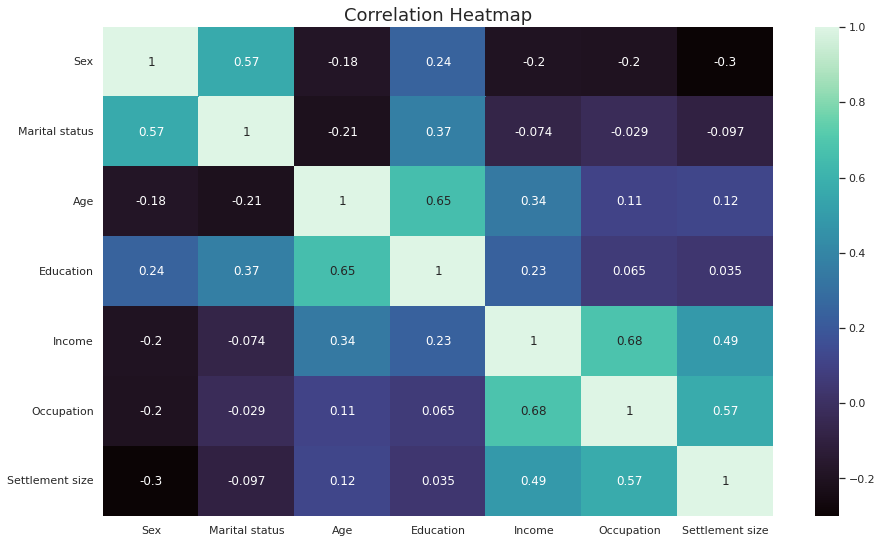

In [13]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(), annot=True, cmap='mako')
plt.title('Correlation Heatmap', fontsize=18)
plt.yticks(rotation = 0)
plt.show()

There is a strong correlation between Education and Age. We could assume, older people tend to be more highly educated.

How about income and occupation?

Income and occupation correlation is 0.68. A higher income, could indicate a white collar occupation such as a Lawyer.

##Data Preprocessing

We need to apply standardization to our features before using any distance-based machine learning model such as K-Means, KNN.

We want to treat all the features equally and we can achieve that by transforming the features in such a way that their values fall within the same numerical range such as [0:1].

This process is commonly referred to as Standardization.

In [14]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

##K-means Clustering

We consider 1 to 10 clusters, so our for loop runs 10 iterations. In addition we run the algortihm at many different starting points - k means plus plus. And we set a random state for reproducibility.

In [15]:
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters= i, init = 'k-means++', random_state=42)
  kmeans.fit(df_std)
  wcss.append(kmeans.inertia_)

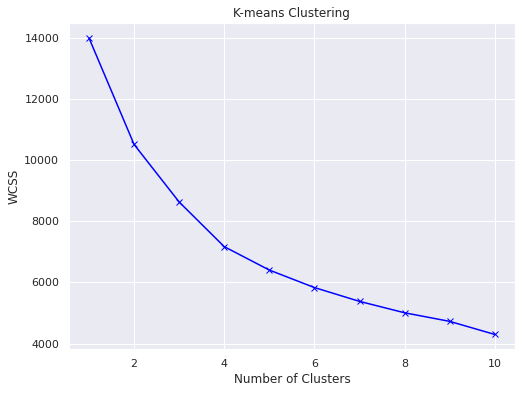

In [18]:
#Visualizing the clusters
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), wcss, marker = 'x', linestyle = '-', color='blue')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [19]:
#We will use 4 clusters, the graph indicates the elbow at 4.
kmeans = KMeans(n_clusters=4, init = 'k-means++', random_state = 42)
kmeans.fit(df_std)

KMeans(n_clusters=4, random_state=42)

In [21]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_segm_kmeans = df_std.copy()
df_segm_kmeans = pd.DataFrame(data = df_std,columns = df.columns)
df_segm_kmeans['Segment K-means'] = kmeans.labels_

df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3


In [22]:
#Group the customers by clusters and see the average values for each variable.
df_segm_analysis = df_segm_kmeans.groupby(['Segment K-means']).mean()
df_segm_analysis.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
0,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
1,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
2,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
3,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [23]:
#Label segments according to their relevance.
df_segm_analysis.rename({0:'well-off',
                         1:'fewer-opportunities',
                         2:'standard',
                         3:'career focused'})

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Segment K-means,,,,,,,
well-off,0.090136,0.391040,1.689452,1.819919,0.981226,0.499317,0.457039
fewer-opportunities,-0.209147,-0.954062,-0.028257,-0.485711,-0.606168,-0.754190,-0.856438
standard,0.796753,1.001351,-0.592830,0.050173,-0.398834,-0.276394,-0.389380
career focused,-0.857528,-0.645647,-0.023378,-0.508091,0.531869,0.722760,0.964888


In [25]:
# Add the segment labels to our table
df_segm_kmeans['Labels'] = df_segm_kmeans['Segment K-means'].map({0:'well-off', 
                                                                  1:'fewer opportunities',
                                                                  2:'standard', 
                                                                  3:'career focused'})

df_segm_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment K-means,Labels
0,-0.917399,-0.993024,2.653614,1.604323,0.097524,0.296823,1.552326,0,well-off
1,1.090038,1.007025,-1.187132,-0.063372,0.782654,0.296823,1.552326,2,standard
2,-0.917399,-0.993024,1.117316,-0.063372,-0.833202,-1.269525,-0.909730,1,fewer opportunities
3,-0.917399,-0.993024,0.775916,-0.063372,1.328386,0.296823,0.321298,3,career focused
4,-0.917399,-0.993024,1.458716,-0.063372,0.736932,0.296823,0.321298,3,career focused


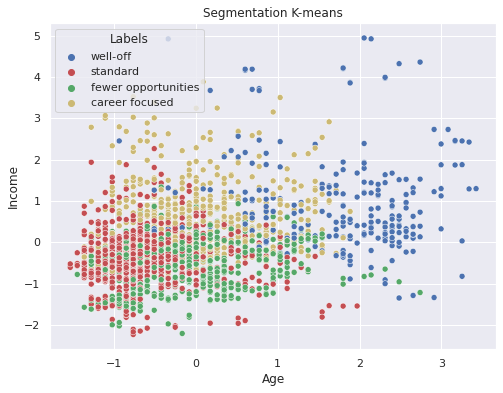

In [28]:
#Visualize the results, each data point is plotted with the color of the cluster.
x_axis = df_segm_kmeans['Age']
y_axis = df_segm_kmeans['Income']
plt.figure(figsize = (8,6))
sns.scatterplot(x_axis, y_axis, hue = df_segm_kmeans['Labels'], palette=['b','r','g','y'])
plt.title('Segmentation K-means')
plt.show()

We can see the blue segment well off is clearly separated as it is highest in both age and income. But the other three are grouped together.

We can conclude that K-Means did a decent job! However, it’s hard to separate segments from each other.

We will combine PCA and K-Means to get a better result.
PCA with K-Means for Better Visualization

We will apply dimensionality reduction to simplify the problem.



In [29]:
pca = PCA()
pca.fit(df_std)

PCA()

In [30]:
#Variance ratio by each component
pca.explained_variance_ratio_

array([0.35696328, 0.26250923, 0.18821114, 0.0755775 , 0.05716512,
       0.03954794, 0.02002579])

We observe that the first component explains around 36 % of the variability of the data. The second one is 26 % and so on.

We plot the cumulative variance explained by total number of components.
On this graph we choose the subset of components we want to keep. 
We want to keep around 80 % of the explained variance.

Text(0, 0.5, 'Cumulative Explained Variance')

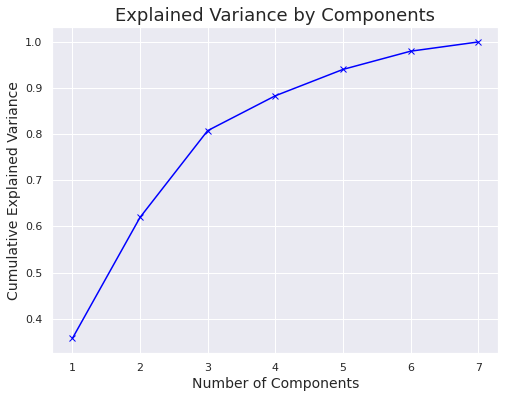

In [31]:
plt.figure(figsize = (8,6))
plt.plot(range(1,8), pca.explained_variance_ratio_.cumsum(), marker = 'x', linestyle='-',color='blue')
plt.title('Explained Variance by Components', fontsize=18)
plt.xlabel('Number of Components', fontsize=14)
plt.ylabel('Cumulative Explained Variance', fontsize=14)

80 % of the variance of the data is explained by the first 3 components. Let’s keep the first 3 components for our further analysis.

In [32]:
pca = PCA(n_components=3)
pca.fit(df_std)
pca.components_

array([[-0.31469524, -0.19170439,  0.32609979,  0.15684089,  0.52452463,
         0.49205868,  0.46478852],
       [ 0.45800608,  0.51263492,  0.31220793,  0.63980683,  0.12468314,
         0.01465779, -0.06963165],
       [-0.29301261, -0.44197739,  0.60954372,  0.27560461, -0.16566231,
        -0.39550539, -0.29568503]])

The result is a 3 by 7 array. We reduced our features to three components from the original seven values that explain the shape the values themselves show the so-called loadings.

Loadings are correlations between an original variable and the component.

For instance, the first value of the array shows the loading of the first feature on the first component.

We will put this information in a pandas data frame so that we can see them better. Columns are seven original features and rows are three components that PCA gave us.

In [34]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                            columns = df.columns,
                            index = ['Comp_1', 'Comp_2', 'Comp_3'])

df_pca_comp

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
Comp_1,-0.314695,-0.191704,0.326100,0.156841,0.524525,0.492059,0.464789
Comp_2,0.458006,0.512635,0.312208,0.639807,0.124683,0.014658,-0.069632
Comp_3,-0.293013,-0.441977,0.609544,0.275605,-0.165662,-0.395505,-0.295685


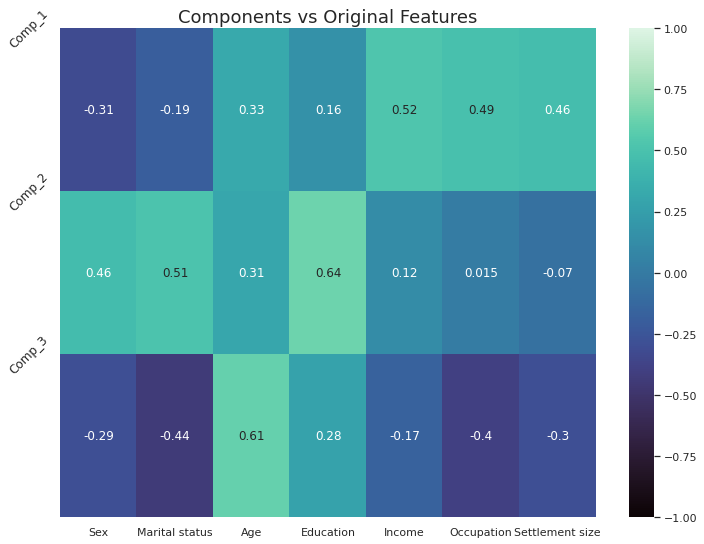

In [35]:
# Heat Map for Principal Components against original features. 
plt.figure(figsize=(12,9))
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'mako',
            annot = True)
plt.yticks([0, 1, 2], 
           ['Comp_1', 'Comp_2', 'Comp_3'],
           rotation = 45,
           fontsize = 12)
plt.title('Components vs Original Features',fontsize = 18)
plt.show()

We see that there is a positive correlation between Comp_1 and Age,Income, Occupation and Settlement size. These are strictly related to the career of a person. So this component shows the career focus of the individual.

For Comp_2 Sex, Marital status and Education are by far the most prominent determinants.

For Comp_3, we realize that Age, Marital Status, and Occupation are the most important features. We observed that marital status and occupation load negatively but are still important.

Now, we have an idea about our new variables(components). We can clearly see the relationship between components and variables.

Let’s transform our data and save it scores_pca.

In [37]:
pca.transform(df_std)

array([[ 2.51474593,  0.83412239,  2.1748059 ],
       [ 0.34493528,  0.59814564, -2.21160279],
       [-0.65106267, -0.68009318,  2.2804186 ],
       ...,
       [-1.45229829, -2.23593665,  0.89657125],
       [-2.24145254,  0.62710847, -0.53045631],
       [-1.86688505, -2.45467234,  0.66262172]])

In [38]:
scores_pca = pca.transform(df_std)

##K-means clustering with PCA

Our new dataset is ready! It’s time to apply K-Means to our new dataset with 3 components.

We follow the same steps with standard K-Means.

In [39]:
# We fit K means using the transformed data from the PCA.
wcss = []
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

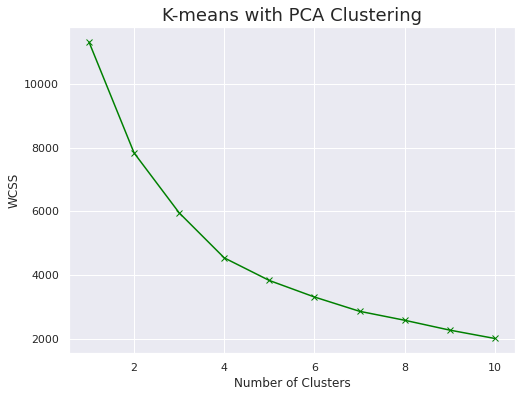

In [42]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
plt.figure(figsize = (8,6))
plt.plot(range(1, 11), wcss, marker = 'x', linestyle = '-',color='green')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering',fontsize = 18)
plt.show()

In [43]:
#Once again the optimal number is 4
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)

kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=42)

##K-means clustering with PCA results

In [44]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_segm_pca_kmeans = pd.concat([df.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3: ] = ['Comp_1', 'Comp_2', 'Comp_3']
# The last column we add contains the pca k-means clustering labels.
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

df_segm_pca_kmeans.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3,Segment K-means PCA
0,0,0,67,2,124670,1,2,2.514746,0.834122,2.174806,3
1,1,1,22,1,150773,1,2,0.344935,0.598146,-2.211603,0
2,0,0,49,1,89210,0,0,-0.651063,-0.680093,2.280419,2
3,0,0,45,1,171565,1,1,1.714316,-0.579927,0.730731,1
4,0,0,53,1,149031,1,1,1.626745,-0.440496,1.244909,1


In [45]:
# We calculate the means by segments.
df_segm_pca_kmeans_freq = df_segm_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3
Segment K-means PCA,,,,,,,,,,
0,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410
1,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046
2,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644
3,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039


In [46]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_segm_pca_kmeans_freq['N Obs'] = df_segm_pca_kmeans[['Segment K-means PCA','Sex']].groupby(['Segment K-means PCA']).count()
df_segm_pca_kmeans_freq['Prop Obs'] = df_segm_pca_kmeans_freq['N Obs'] / df_segm_pca_kmeans_freq['N Obs'].sum()
df_segm_pca_kmeans_freq = df_segm_pca_kmeans_freq.rename({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})
df_segm_pca_kmeans_freq

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Comp_1,Comp_2,Comp_3,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,
standard,0.900289,0.965318,28.878613,1.060694,107551.500000,0.677746,0.440751,-1.107019,0.703776,-0.781410,692,0.3460
career focused,0.027444,0.168096,35.737564,0.734134,141525.826758,1.267581,1.480274,1.372663,-1.046172,-0.248046,583,0.2915
fewer opportunities,0.306522,0.095652,35.313043,0.760870,93692.567391,0.252174,0.039130,-1.046406,-0.902963,1.003644,460,0.2300
well-off,0.505660,0.690566,55.679245,2.128302,158019.101887,1.120755,1.101887,1.687328,2.031200,0.844039,265,0.1325


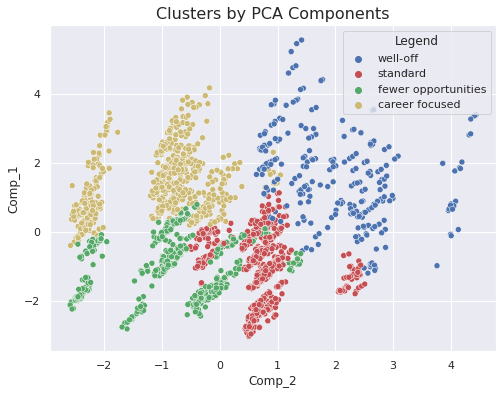

In [48]:
#We obtained columns and changed the name with a few line of codes.
#Now, we plot our new segments and see the differences.
df_segm_pca_kmeans['Legend'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0:'standard', 
                                                          1:'career focused',
                                                          2:'fewer opportunities', 
                                                          3:'well-off'})

# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_segm_pca_kmeans['Comp_2']
y_axis = df_segm_pca_kmeans['Comp_1']
plt.figure(figsize = (8,6))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Legend'], palette = ['b','r','g','y'])
plt.title('Clusters by PCA Components',fontsize=16)
plt.show()


When we plotted the K means clustering solution without PCA, we were only able to distinguish the blue segment, but the division based on the components is much more pronounced.

One of the goals of PCA is to reduce the number of variables by combining them into bigger ones.

Conclusion

We segmented our customers into 4 groups. We can start choosing our groups based on our goals and aim our marketing at them!

Segmentation helps marketers to be more efficient in terms of time, money and other resources.

They gain a better understanding of customer's needs and wants and therefore can tailor campaigns to customer segments most likely to purchase products.